In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta, date, time
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline
# get directory address
path= os.getcwd()+"/"

# Flights EDA
> load data

In [2]:
col_names= ["cancelled", "month", "dep_time", "uniq_carrier", "sched_elap_time", "arr_delay", "dep_delay", "dis_ml"]
#col_names= ["cancelled", "month", "departuretime", "uniquecarrier", "schedelapsedtime", "arrdelay", "depdelay", "distance"]
col_names

['cancelled',
 'month',
 'dep_time',
 'uniq_carrier',
 'sched_elap_time',
 'arr_delay',
 'dep_delay',
 'dis_ml']

In [3]:
df= pd.read_csv(path+"CancelledFlights.csv", header= None, names= col_names)
df

cancelled  month  dep_time uniq_carrier  sched_elap_time  arr_delay  \
0             1     12      3214           UA             134           0   
1             1     12       830           DL              90           0   
2             1      1      1835           UA             213           0   
3             1      4      1730           AA              80           0   
4             1      7      1442           UA             103           0   
...         ...    ...       ...          ...             ...         ...   
5995          0      6      1725           AA             115          17   
5996          0      9      1945           DL             127         -19   
5997          0      8      1850           DL             101           6   
5998          0      7      1720           AA             210         178   
5999          0      9      1955           AA             265           4   

      dep_delay  dis_ml  
0             0   679.0  
1             0   214.0  
2             0  1605.0  
3             0   235.0  
4             0   413.0  
...         ...     ...  
5995         30   597.0  
5996         -9   752.0  
5997         -4   481.0  
5998         42  1302.0  
5999          3  1721.0  

[6000 rows x 8 columns]

### 1.1 Data Types and Descriptive Stats

> check data types
* all columns except uqiquecarrie and distance are integer
* we will have to change the cancelled column to categorical as its showing 1,0 boolean values which present if the flight is cancelled or not
* departure time is in integer format that needs changing to date format
* may be unique carrier also needs to be changed to categorical

In [4]:
pd.DataFrame(df.dtypes).T

cancelled  month dep_time uniq_carrier sched_elap_time arr_delay dep_delay  \
0     int64  int64    int64       object           int64     int64     int64   

    dis_ml  
0  float64

> table below shows the summary of the data.
* Max departure time is 3313 which needs further investigation as it cannot be more than 2359 (i am assuming its a typo, from 23 to 33)
* Most frequent carrier is AA.
* Average flight duration is 161 mins
* average arrival delay is 8 mins with a max delay of 410 mins 
* average departure delay is 9 mins with a max delay of 387 mins
* Average distance travelled by flights is 986.2 km
* all variable show count of 6000 except for dis_ml which is 5971, which means this column has missing values.

In [5]:
df.describe(include="all").round(1)

cancelled   month  dep_time uniq_carrier  sched_elap_time  arr_delay  \
count      6000.0  6000.0    6000.0         6000          6000.0      6000.0   
unique        NaN     NaN       NaN            3             NaN         NaN   
top           NaN     NaN       NaN           AA             NaN         NaN   
freq          NaN     NaN       NaN         2476             NaN         NaN   
mean          0.2     6.2    1332.1          NaN           161.7         8.1   
std           0.4     3.4     461.3          NaN            78.1        35.8   
min           0.0     1.0       5.0          NaN            40.0       -72.0   
25%           0.0     3.0     934.8          NaN           105.0        -8.0   
50%           0.0     6.0    1325.0          NaN           145.0         0.0   
75%           0.0     9.0    1715.0          NaN           200.0        10.0   
max           1.0    12.0    3313.0          NaN           604.0       410.0   

        dep_delay  dis_ml  
count      6000.0  5971.0  
unique        NaN     NaN  
top           NaN     NaN  
freq          NaN     NaN  
mean          9.1   986.3  
std          31.7   646.3  
min         -16.0    68.0  
25%          -3.0   547.0  
50%           0.0   837.0  
75%           6.0  1249.0  
max         387.0  4502.0

* convert the dep_time column to string and then replace 3 with 2 as military time cannot go more than 2359.
* convert integers to 4 digits format so i can convert it into time format

In [6]:
# max time can have 24 hours. if a time string starts with 3 i.e. 30000 it means it is incorrect and it should be 20000.
df["dep_time"]=  df.dep_time.astype("str").str.replace(r'^3', "2") 
df["time"]= ["0"+ x if len(x)==3 else "00"+ x if len(x)==2 else "0"+x if len(x)==1 else x for x in df.dep_time ]
df["time"]= [datetime.strptime(x,"%H%M").strftime("%H:%M") for x in df.time]
df["hour"] = pd.to_datetime(df.time).dt.hour
df.head()

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_5865/4149556831.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["dep_time"]=  df.dep_time.astype("str").str.replace(r'^3', "2")


cancelled  month dep_time uniq_carrier  sched_elap_time  arr_delay  \
0          1     12     2214           UA             134           0   
1          1     12      830           DL              90           0   
2          1      1     1835           UA             213           0   
3          1      4     1730           AA              80           0   
4          1      7     1442           UA             103           0   

   dep_delay  dis_ml   time  hour  
0          0   679.0  22:14    22  
1          0   214.0  08:30     8  
2          0  1605.0  18:35    18  
3          0   235.0  17:30    17  
4          0   413.0  14:42    14

In [7]:
df.dtypes

cancelled            int64
month                int64
dep_time            object
uniq_carrier        object
sched_elap_time      int64
arr_delay            int64
dep_delay            int64
dis_ml             float64
time                object
hour                 int64
dtype: object

### 1.2 Exploratory Data Visualisations (EDA)

> Histograms shows us some useful information:

* proportion of cancelled vs non cancelled flights is 5000 to 1000.
* Most of the flights have schedule flight duration between 85 to 159. Some flights have travel duration of over 600 mins
* Most of the flights have arrival delay of 0 to 4 mins.
* Most of the flights have departure delay of 0 to 1 mins.
* Some flights have a arrival and departure delay of around 400 mins. I am not sure with my current domain knowledge if it is possible or whether its some sort of reporting error.
* Busiest hours for the flights are between 6am to 6pm.


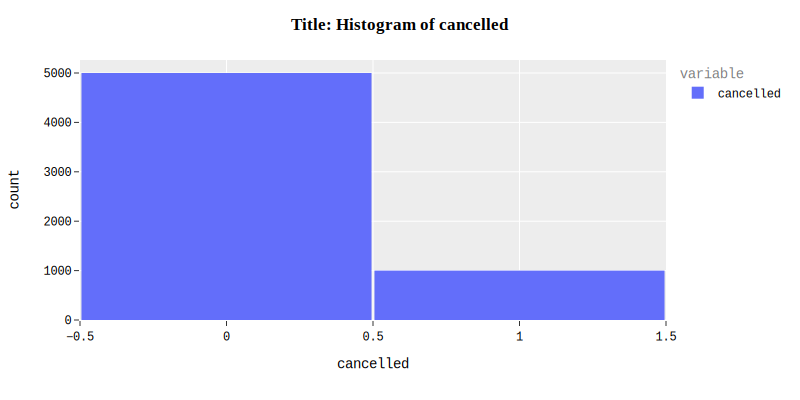

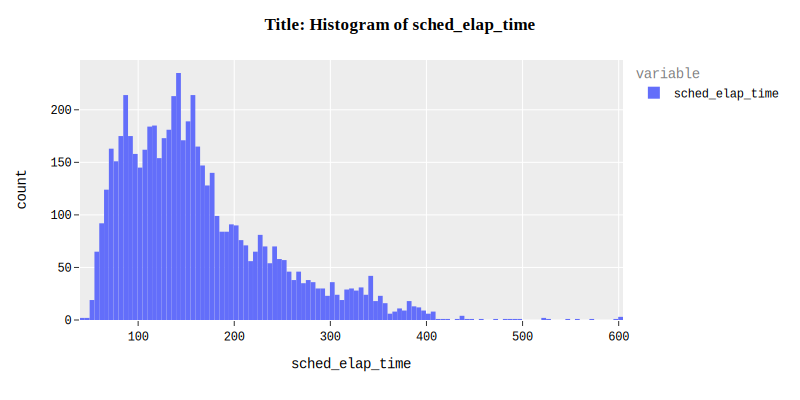

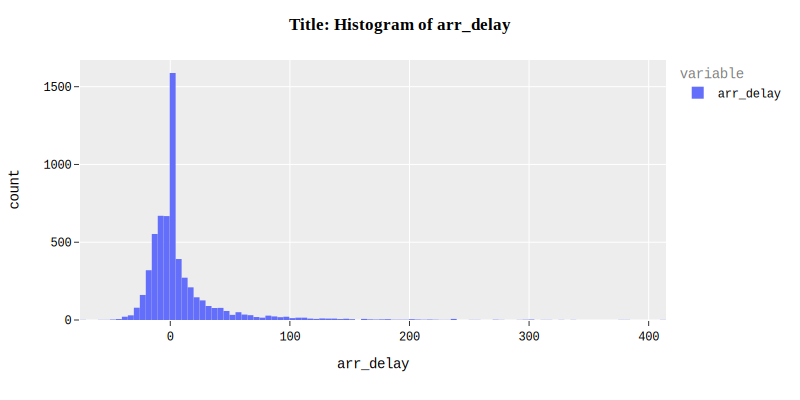

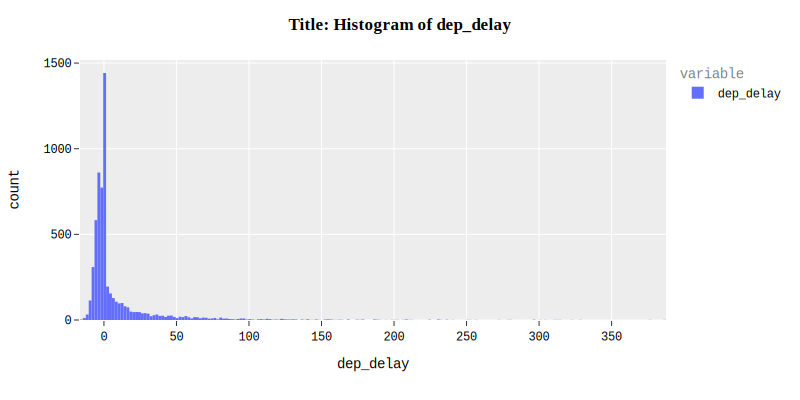

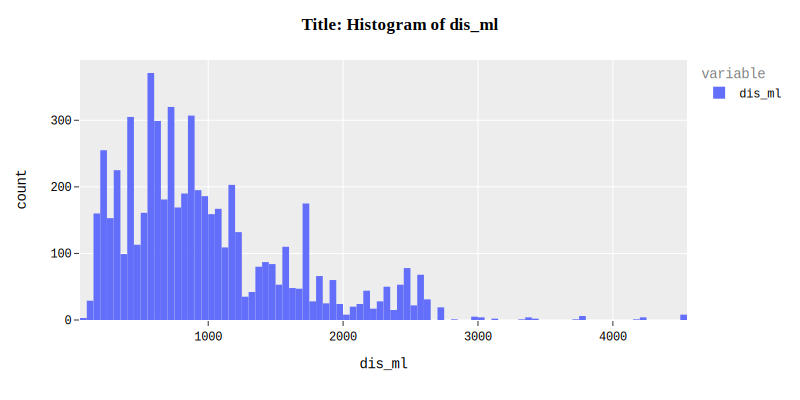

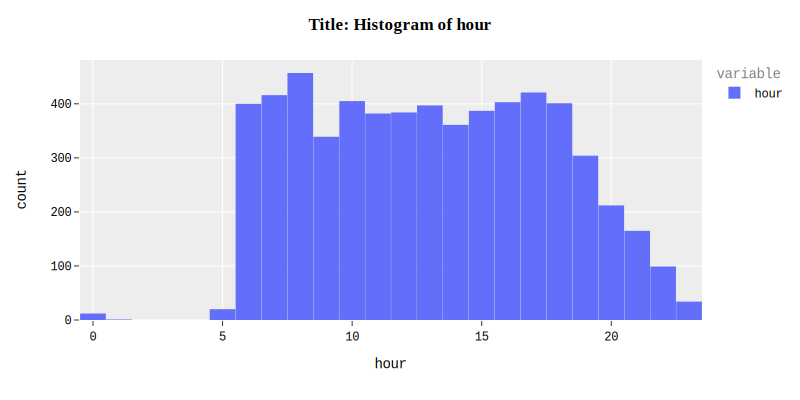

[None, None, None, None, None, None]

In [8]:
#!pip install plotly
import plotly.express as px
#pd.options.plotting.backend = "matplotlib"
pd.options.plotting.backend = "plotly"

def plot_hist(x):
    p=(
        df
        .filter([x])
        .plot.hist(width= 800, height=400)       
        .update_layout(
            template = 'ggplot2',
            bargap=0.01,
            title = "<b> Title: Histogram of {} </b>".format(x),
            xaxis_title = x,                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )        
    )
    return p.show("svg")

list(
    map(
        plot_hist, df.columns[~ df.columns.isin(["uniq_carrier","month", "dep_time", "time"])]
        )
    )

In [9]:
df_mean=(
     df
     .groupby(["cancelled", "uniq_carrier" ])
     .agg(
        mean_elp_time = pd.NamedAgg("sched_elap_time", "mean"),
        mean_arr_del = pd.NamedAgg("arr_delay", "mean"),
        mean_dep_del = pd.NamedAgg("dep_delay", "mean"),
        mean_dis_ml = pd.NamedAgg("dis_ml", "mean"),
        count_cancel = pd.NamedAgg("cancelled", "count")
    )
    .reset_index()
    .assign(uniq_carrier= lambda df_: df_.uniq_carrier.astype("category"),
             cancelled= lambda df_: df_.cancelled.astype("category"),
             perc_flight_cancel= lambda df_: ((df_.count_cancel/df_.count_cancel.sum())).round(4)
             )
)
df_mean

cancelled uniq_carrier  mean_elp_time  mean_arr_del  mean_dep_del  \
0         0           AA     164.838124     11.558749     11.914271   
1         0           DL     156.368245      7.652435      7.641094   
2         0           UA     170.829381      9.411067     12.988801   
3         1           AA     158.154158      0.000000     -0.002028   
4         1           DL     125.201058      0.000000      0.264550   
5         1           UA     150.751572      0.000000      0.147799   

   mean_dis_ml  count_cancel  perc_flight_cancel  
0  1034.229798          1983          0.3305      
1   924.461230          1499          0.2498      
2  1067.592862          1518          0.2530      
3   946.360996           493          0.0822      
4   632.611702           189          0.0315      
5   859.153846           318          0.0530

> below Graph shows a comparison of percetage Flights cancelled for each Carrier.
* Highest Number of cancellation are for AA (8.3%) followed by UA (5.3%)

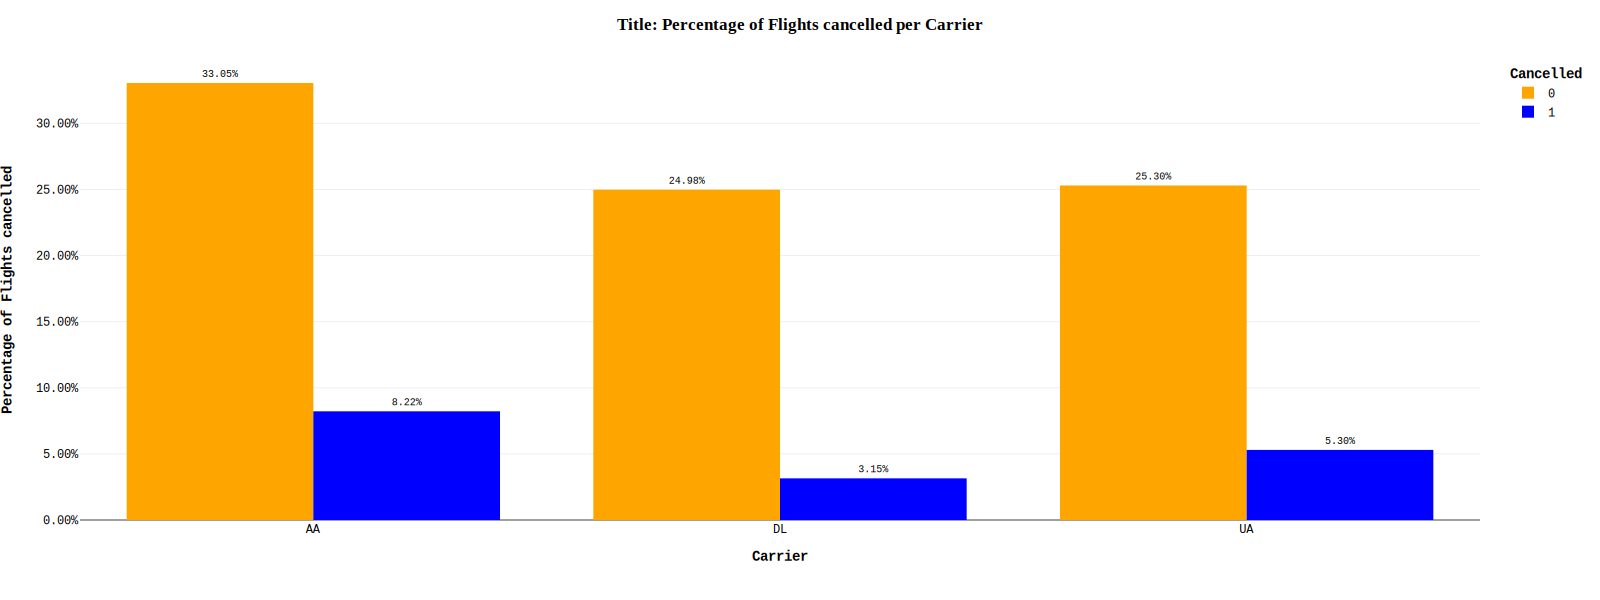

In [10]:
(
    df_mean
    .plot.bar(x="uniq_carrier", y = "perc_flight_cancel",     
              barmode='group', 
              color= "cancelled",
              width= 1600, height=600,
              color_discrete_map={0: 'orange',1: 'blue'},
              labels = "count_cancel", text_auto = True ) 
     .update_traces(textposition='outside', textfont_size =10, 
     #marker_color = ["green", "red", "orange"]
     )       
     .update_yaxes(tickformat= ".2%") 
     .update_layout(                
             template = 'presentation',         
             title = "<b> Title: Percentage of Flights cancelled per Carrier </b>",
             xaxis_title = "<b>Carrier<b>",
             yaxis_title= "<b>Percentage of Flights cancelled<b>",
             font_family="Courier New",
             font_color="black",
             font_size = 12,
             title_font_family="Times New Roman",
             title_font_color="black",        
             legend_title_font_color= "grey",
             legend_title= "<b>Cancelled<b>"
             )        
    ).show("svg")


> below Graph shows a comparison of duration and distance of flight for each Carrier. 
* Average flight duration and distance for cancelled flight is smaller then average flight duration of not cancelled flights. Suggesting the flights with smaller duration often get cancelled.

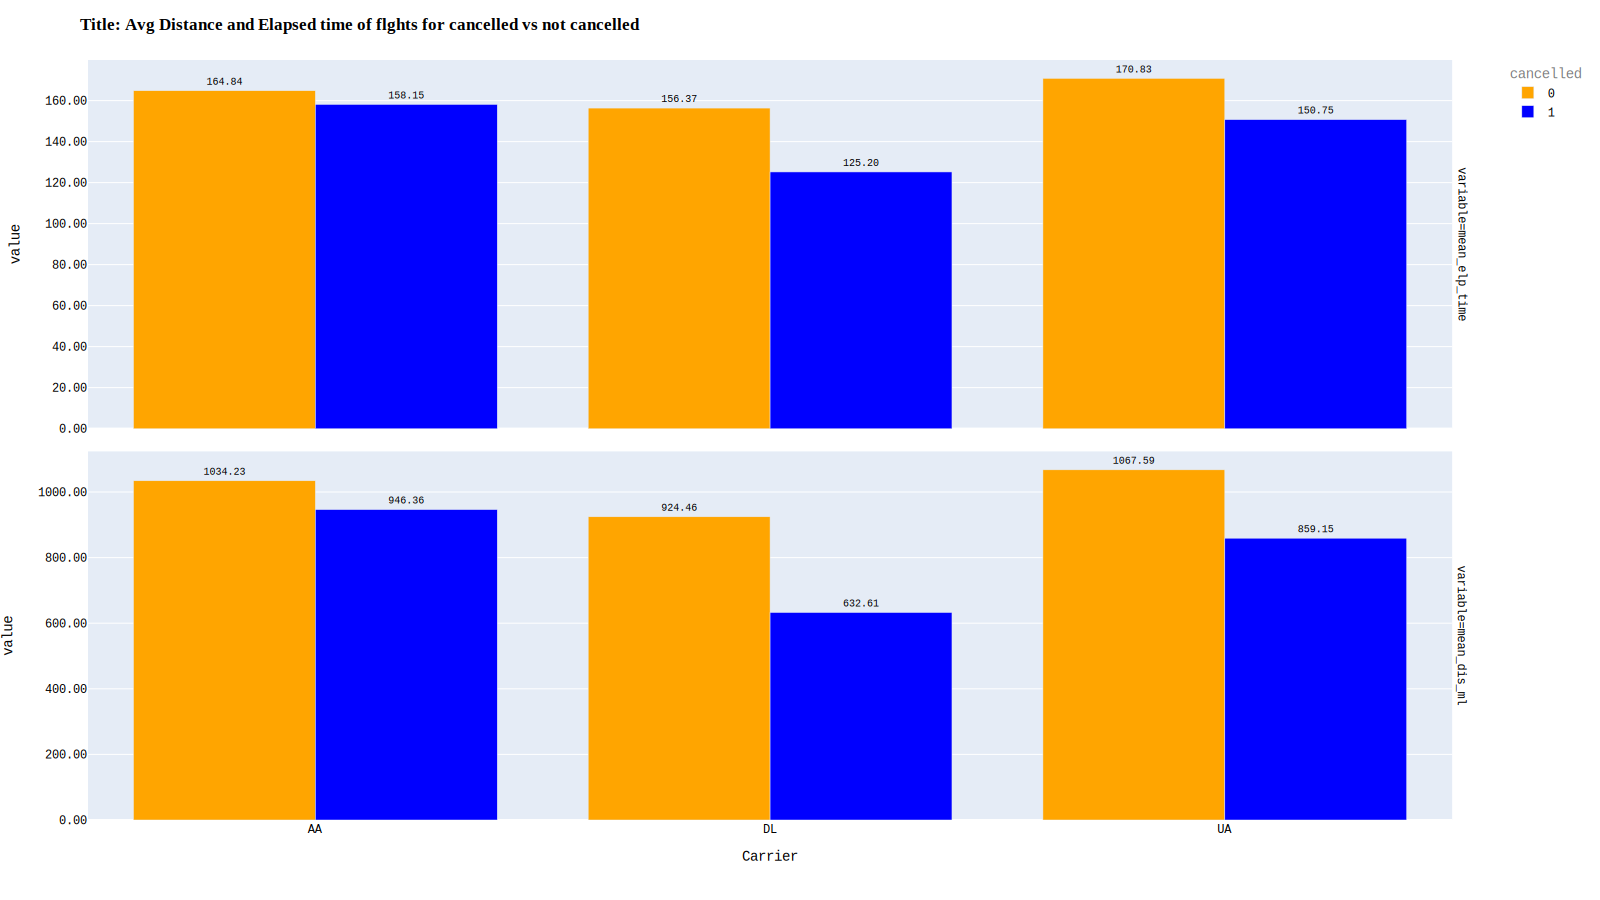

In [11]:
#!pip install regex
import regex as re
p1= (
    df_mean
    .melt(id_vars= ["cancelled", "uniq_carrier"] )
    .query('variable in ["mean_elp_time", "mean_dis_ml"]')
    .plot.bar(x="uniq_carrier", y = "value",     
                barmode='group', 
                color= "cancelled", 
                color_discrete_map={0: 'orange',1: 'blue'},
                facet_row= "variable", 
                text_auto = True,
                width= 1600, height=900, 
                ) 
      .update_traces(textposition='outside', textfont_size =10) 
      .update_yaxes(matches=None,showticklabels=True, tickformat= ".2f" )
      .update_xaxes(matches=None)    
      .update_layout(            
            title = "<b> Title: Avg Distance and Elapsed time of flghts for cancelled vs not cancelled </b>",
            xaxis_title = "Carrier",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey",            
            ) 
        .update_yaxes(matches=None)               
    )
p1.show("svg")

> below Graph shows a comparison of departure and arrival delay for each Carrier. 
* Average departure and arrival delay is higher for AA and UA flights, this may be one of the reason why these carriers have higher cancellation percentage. 

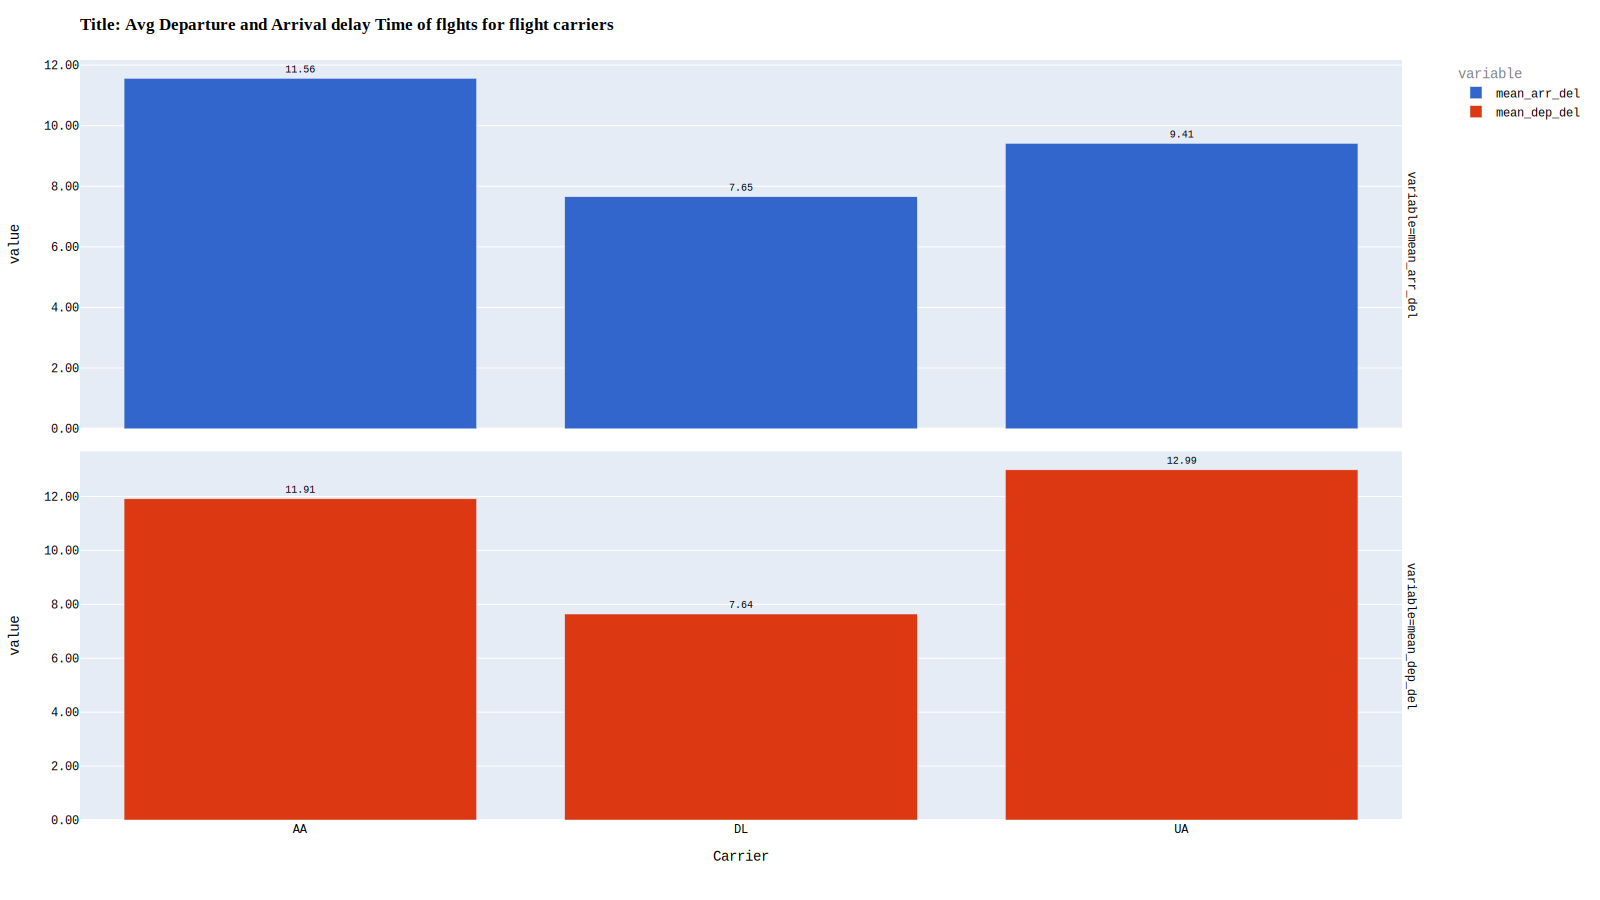

In [12]:
p=(
df_mean  
.query(" cancelled == 0 ")   
.melt(id_vars= ["cancelled", "uniq_carrier"] )
.query('variable in ["mean_dep_del", "mean_arr_del"]')  
.plot.bar(x="uniq_carrier", y = "value",     
                barmode='group', 
                color= "variable", 
                color_discrete_sequence=px.colors.qualitative.G10,
                width= 1600, height=900,
                #color_discrete_map= {"mean_arr_del": 'orange',"mean_dep_del": 'blue'},

                facet_row= "variable", text_auto = True) 
.update_traces(textposition='outside',textfont_size =10) 
.update_yaxes(matches=None,showticklabels=True, tickformat= ".2f")
.update_xaxes(matches=None)    
.update_layout(            
    title = "<b> Title: Avg Departure and Arrival delay Time of flghts for flight carriers </b>",
    xaxis_title = "Carrier",                       
    font_family="Courier New",
    font_color="black",
    font_size = 12,
    title_font_family="Times New Roman",
    title_font_color="black",        
    legend_title_font_color= "grey"
    )                       
)
p.show("svg")

In [13]:
df.isna().sum().to_frame().T

cancelled  month  dep_time  uniq_carrier  sched_elap_time  arr_delay  \
0          0      0         0             0               0           0   

   dep_delay  dis_ml  time  hour  
0          0      29     0     0

In [14]:
df_stat_month=(
     df
     .groupby(["cancelled", "month" ])
     .agg(
        mean_elp_time = pd.NamedAgg("sched_elap_time", "mean"),
        mean_arr_del = pd.NamedAgg("arr_delay", "mean"),
        mean_dep_del = pd.NamedAgg("dep_delay", "mean"),
        mean_dis_ml = pd.NamedAgg("dis_ml", "mean"),
        count_cancel = pd.NamedAgg("cancelled", "count")
    )
    .reset_index()
     .assign(
              cancelled= lambda df_: df_.cancelled.astype("category")     
              )
)
df_cancel_monthly= pd.merge(df_stat_month, df_stat_month.groupby("month").agg(monthly_flights= pd.NamedAgg("count_cancel", "sum")).reset_index(),
                            how= "left",
                            on = "month").assign(              
                                                 perc_flight_cancel= lambda df_: (df_.count_cancel/df_.monthly_flights).round(2)
                                                 )
df_cancel_monthly.head()

cancelled  month  mean_elp_time  mean_arr_del  mean_dep_del  mean_dis_ml  \
0         0      1     166.211538      8.620192     11.088942  1018.038462   
1         0      2     170.907193     13.104408     14.566125  1049.046404   
2         0      3     164.757732     11.239691     11.778351  1007.783505   
3         0      4     170.904762     10.460317     10.793651  1075.111364   
4         0      5     163.495556      6.306667      7.975556  1017.405345   

   count_cancel  monthly_flights  perc_flight_cancel  
0           416             539             0.77      
1           431             571             0.75      
2           388             517             0.75      
3           441             588             0.75      
4           450             515             0.87

> Graph below shows a cancelled vs not cancelled flights over the 12 months. 
* Highest percentage of cancelled flights are in months, 1,2,3,4, and 12

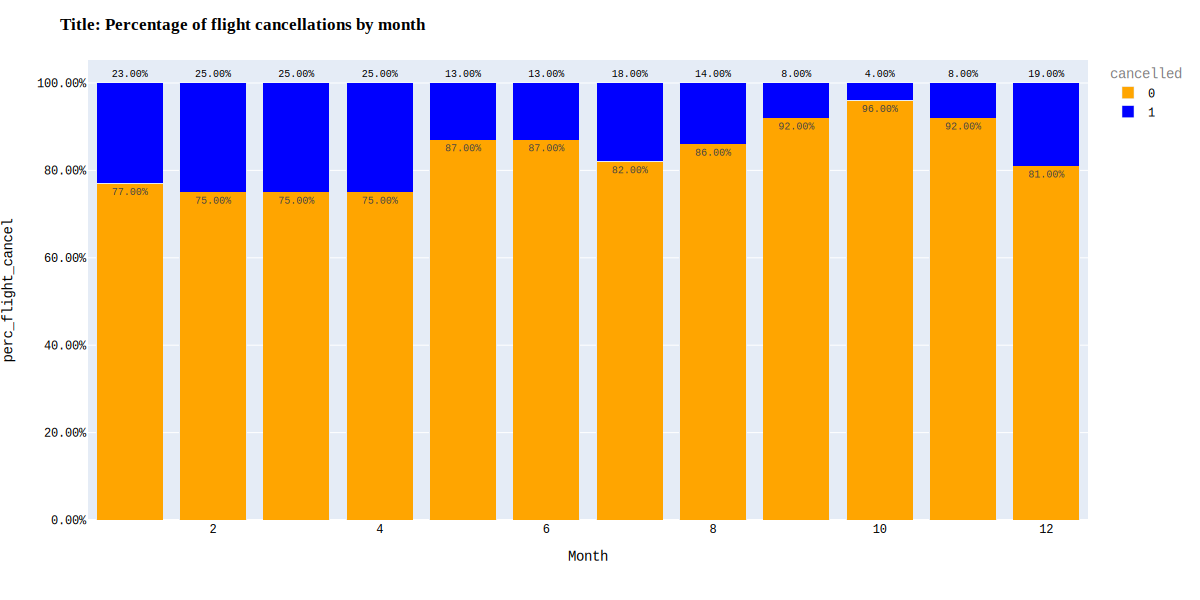

In [15]:
(
    df_cancel_monthly
    .plot.bar(x= "month", y= "perc_flight_cancel", 
            color = "cancelled", 
            color_discrete_map={0: 'orange',1: 'blue'},
            #color_discrete_sequence=['orange', 'blue'],
            width= 1200, height=600,
            barmode= "stack", text_auto= True ) 
    #.update_layout(yaxis_tickformat = '%')
     .update_traces(textposition='outside',textfont_size =10)  
     .update_yaxes(tickformat = ".2%")
     .update_layout(            
            title = "<b> Title: Percentage of flight cancellations by month </b>",
            xaxis_title = "Month",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
).show("svg")

> Graph below shows total number of flights per month. 
* From previous graph we find that highest percetage of cancellations are in months 1,2,3,4, and 12. From graph below we see these are the busiest months. 
* Probably busy months have more issues with managing flights which is causing higher percentage of cancellations

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_5865/2415528424.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



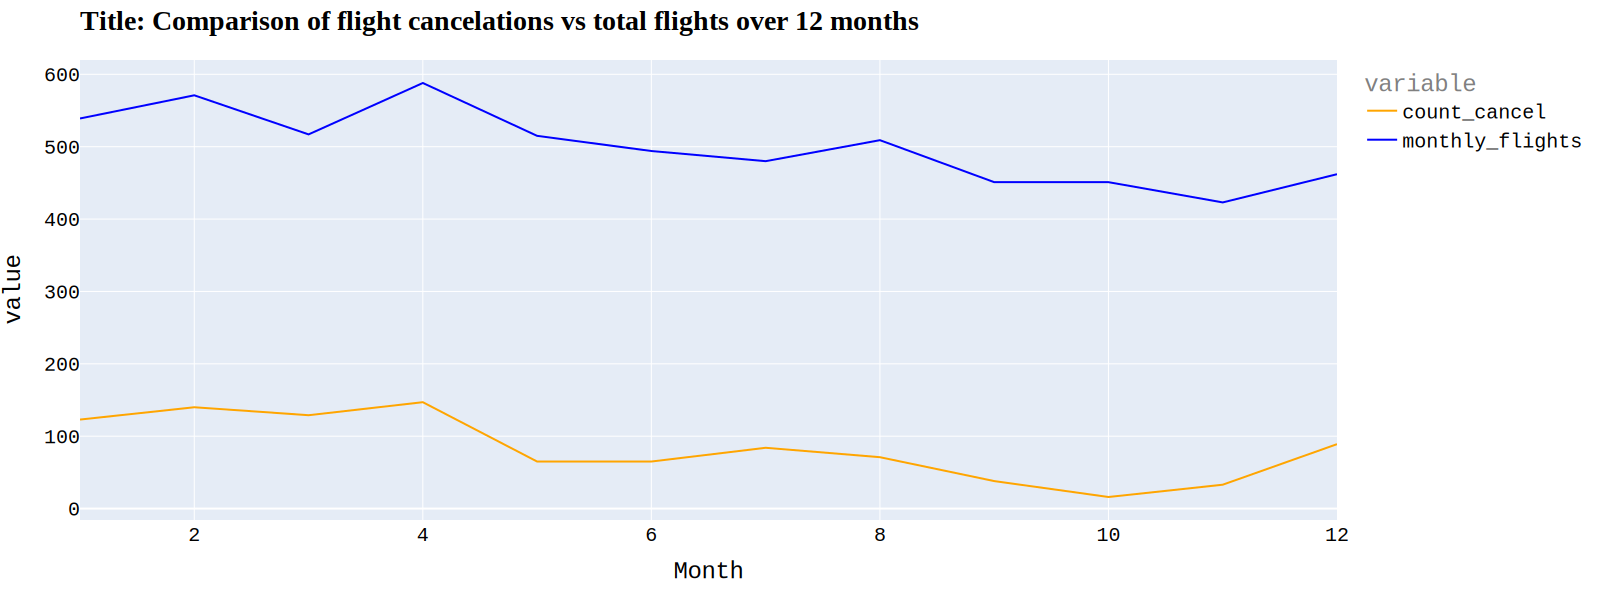

In [16]:
(
    df_cancel_monthly
    .query("cancelled == 1")
    .groupby("month")
    .sum()
    .reset_index()
    .melt(id_vars=["month"] )
    .query('variable in ["monthly_flights", "count_cancel"]')
    .plot.line(x= "month", y= "value", 
                color="variable",                 
                #color_discrete_map={ "count_cancel": 'orange',"monthly_flights": 'blue'},
                color_discrete_sequence= ['orange','blue'],
                width= 1600, height=600,)     
    #.update_traces(textposition='outside')  
     .update_layout(            
            title = "<b> Title: Comparison of flight cancelations vs total flights over 12 months </b>",
            xaxis_title = "Month",                       
            font_family="Courier New",
            font_color="black",
            font_size = 20,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
).show("svg")

In [17]:
df_stat_hourly=(
     df
     .assign(cancelled = df.cancelled.astype("category"),
            hour = pd.to_datetime(df.time).dt.hour,
            )
     .groupby(["cancelled","hour" ])
     .agg(
        mean_elp_time = pd.NamedAgg("sched_elap_time", "mean"),
        mean_arr_del = pd.NamedAgg("arr_delay", "mean"),
        mean_dep_del = pd.NamedAgg("dep_delay", "mean"),
        mean_dis_ml = pd.NamedAgg("dis_ml", "mean"),
        count_cancel = pd.NamedAgg("cancelled", "count")
    )
    .reset_index()
     .assign(
              cancelled= lambda df_: df_.cancelled.astype("category")     
              )
)
df_stat_hourly.head()


cancelled  hour  mean_elp_time  mean_arr_del  mean_dep_del  mean_dis_ml  \
0         0     0     207.916667     -4.000000      4.083333  1556.333333   
1         0     1     190.000000     69.000000     70.000000  1464.000000   
2         0     5     139.611111      0.222222     -3.166667   791.333333   
3         0     6     162.587349      1.099398      1.114458  1016.933735   
4         0     7     170.896936      2.392758      2.153203  1045.969101   

   count_cancel  
0            12  
1             1  
2            18  
3           332  
4           359

In [18]:
df_cancel_hourly=  pd.merge(df_stat_hourly, df_stat_hourly.groupby(["hour"]).agg(hourly_flights= pd.NamedAgg("count_cancel", "sum")).reset_index(),
                             how= "left" ,
                             on = ["hour"]).assign(              
                                                 perc_flight_cancel= lambda df_: (df_.count_cancel/df_.hourly_flights).round(2)
                                                 )
df_cancel_hourly.head()

cancelled  hour  mean_elp_time  mean_arr_del  mean_dep_del  mean_dis_ml  \
0         0     0     207.916667     -4.000000      4.083333  1556.333333   
1         0     1     190.000000     69.000000     70.000000  1464.000000   
2         0     5     139.611111      0.222222     -3.166667   791.333333   
3         0     6     162.587349      1.099398      1.114458  1016.933735   
4         0     7     170.896936      2.392758      2.153203  1045.969101   

   count_cancel  hourly_flights  perc_flight_cancel  
0            12              12            1.00      
1             1               1            1.00      
2            18              20            0.90      
3           332             400            0.83      
4           359             416            0.86

> Graphs below shows a cancelled vs not cancelled flights and the total number of flights for 24 hours.
* Highest percentage of cancelled flights are during the busy hours.

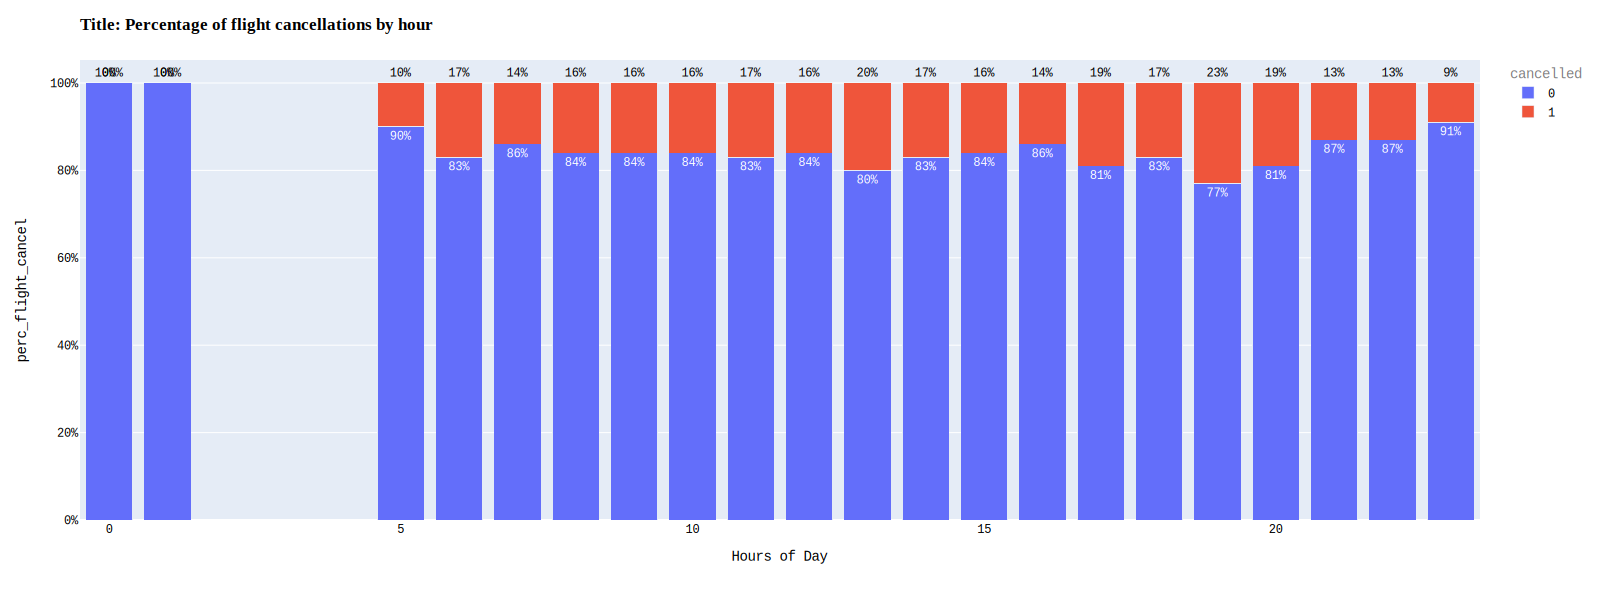

In [19]:
(
    df_cancel_hourly
    .plot.bar(x= "hour", y= "perc_flight_cancel", 
              color = "cancelled", barmode= "stack", 
              text_auto= True,               
              width= 1600, height=600,
              )     
     .update_traces(textposition='outside')  
     .update_yaxes(tickformat = ".0%")     
     .update_layout(            
            title = "<b> Title: Percentage of flight cancellations by hour </b>",
            xaxis_title = "Hours of Day",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
).show("svg")

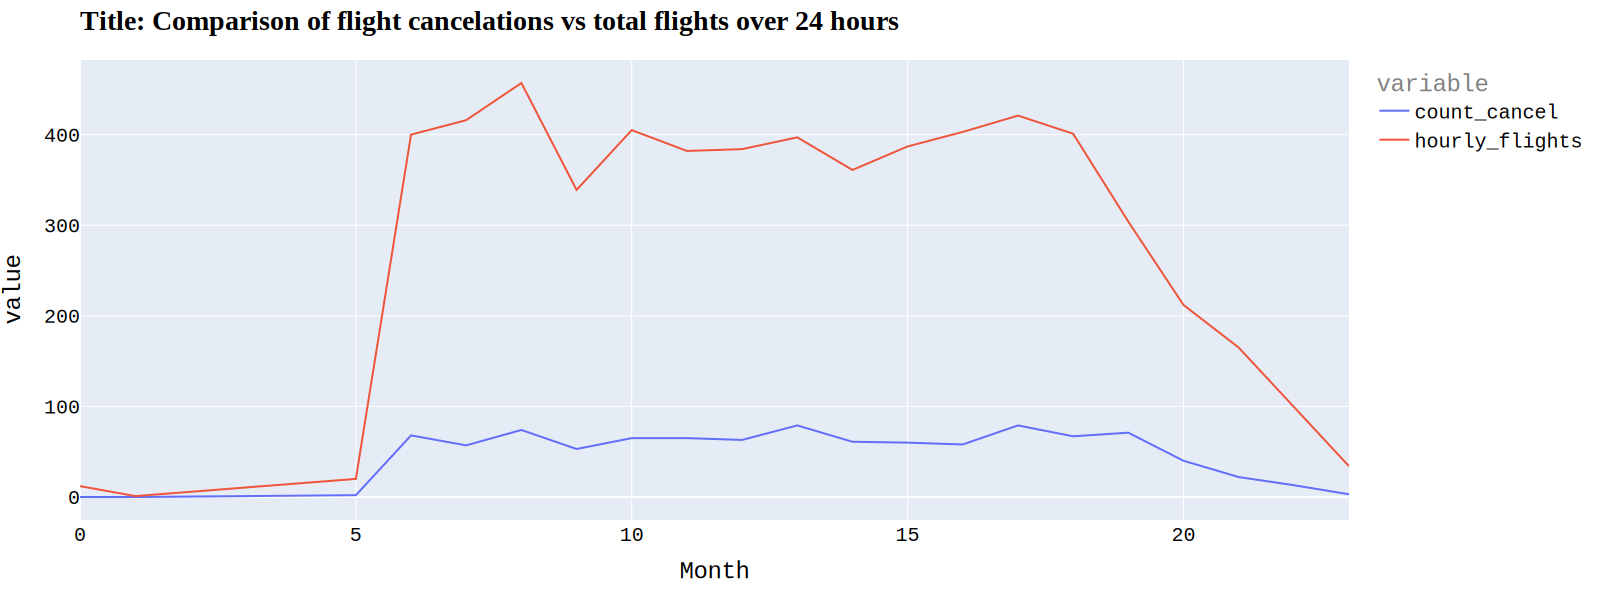

In [20]:
p=(
    df_cancel_hourly
    .query("cancelled == 1")
    .groupby("hour")
    .agg("sum", numeric_only=True)
    .reset_index()
    .melt(id_vars=["hour"] )
    .query('variable in ["hourly_flights", "count_cancel"]')
    .plot.line(x= "hour", y= "value", color="variable", width= 1600, height=600,)     
    #.update_traces(textposition='outside')  
     .update_layout(            
            title = "<b> Title: Comparison of flight cancelations vs total flights over 24 hours </b>",
            xaxis_title = "Month",                       
            font_family="Courier New",
            font_color="black",
            font_size = 20,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
)
p.show("svg")

> taking average by cancelled or not cancelled flight shows us some useful information
* average distance and duration travel is lower for cancelled flights
* avg arrival delay is 0 as cancelled flights wont have arrival delay as they arent flying
* average departure time shows also near to 0 average this also seems like a data error as cancelled flights wont depart and shouldnt have any departure delay values.

In [21]:
df.groupby("cancelled").mean()

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_5865/3607961424.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



month  sched_elap_time  arr_delay  dep_delay       dis_ml     hour
cancelled                                                                     
0          6.4278        164.1178      9.7356    10.9594  1011.432552  13.0066
1          5.1820        149.5720      0.0000     0.0960   858.587576  13.2310

In [22]:
df.query("cancelled == 1 & dep_delay != 0")

cancelled  month dep_time uniq_carrier  sched_elap_time  arr_delay  \
48           1     12     1844           UA             187           0   
155          1     11      630           DL              73           0   
193          1     11      826           UA             227           0   
307          1     12     2240           DL              57           0   
334          1     11     1310           DL             352           0   
409          1     10      759           UA             281           0   
540          1     12     1445           AA              60           0   
550          1     12     1055           DL             158           0   
849          1     11      900           UA              89           0   
862          1     10     1300           AA              90           0   

     dep_delay  dis_ml   time  hour  
48          46  1197.0  18:44    18  
155         -2   185.0  06:30     6  
193         -6  1739.0  08:26     8  
307         13   215.0  22:40    22  
334         -2  2615.0  13:10    13  
409         14  1619.0  07:59     7  
540          3   190.0  14:45    14  
550         41   950.0  10:55    10  
849         -7   334.0  09:00     9  
862         -4   334.0  13:00    13

> Lets explore if there is any relationship between distance travelled and schedule duratin
* as expected the duration and distance travelled have a psotive and direcet relationship which makes sense

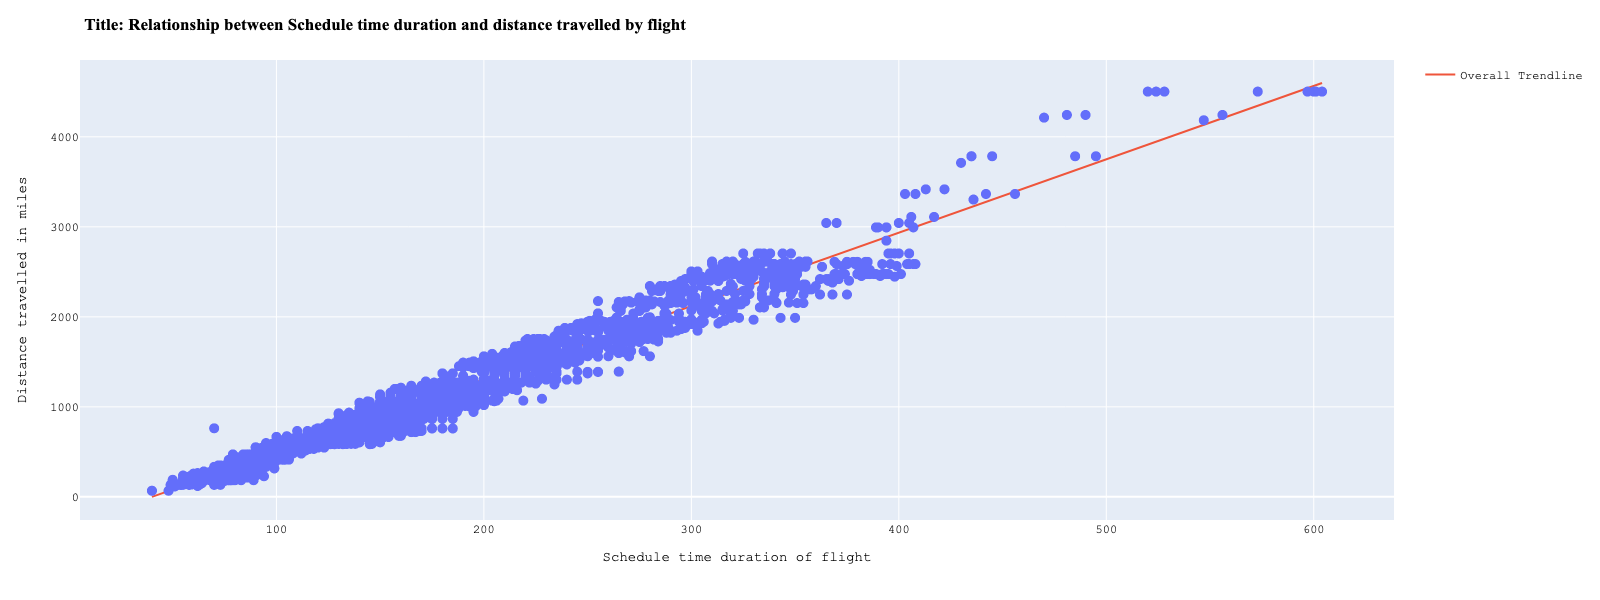

In [23]:
import statsmodels
p=(
    df
     .query("cancelled == 0")     
     .assign(cancelled = df.cancelled.astype("category"))                  
     .plot.scatter(x= "sched_elap_time", y= "dis_ml",
                  trendline= "ols", 
                  #log_y= True,                   
                  width= 1600, height=600,
                  trendline_scope="overall"                                 
                  )           
    .update_traces(marker={"size":10})
    .update_layout(            
            title = "<b> Title: Relationship between Schedule time duration and distance travelled by flight </b>",
            xaxis_title = "Schedule time duration of flight",                       
            yaxis_title = "Distance travelled in miles",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )      
)
p.show("png")

> Graph shows relationship between arrival departure delay
* Flights which arrive late also deprt late.

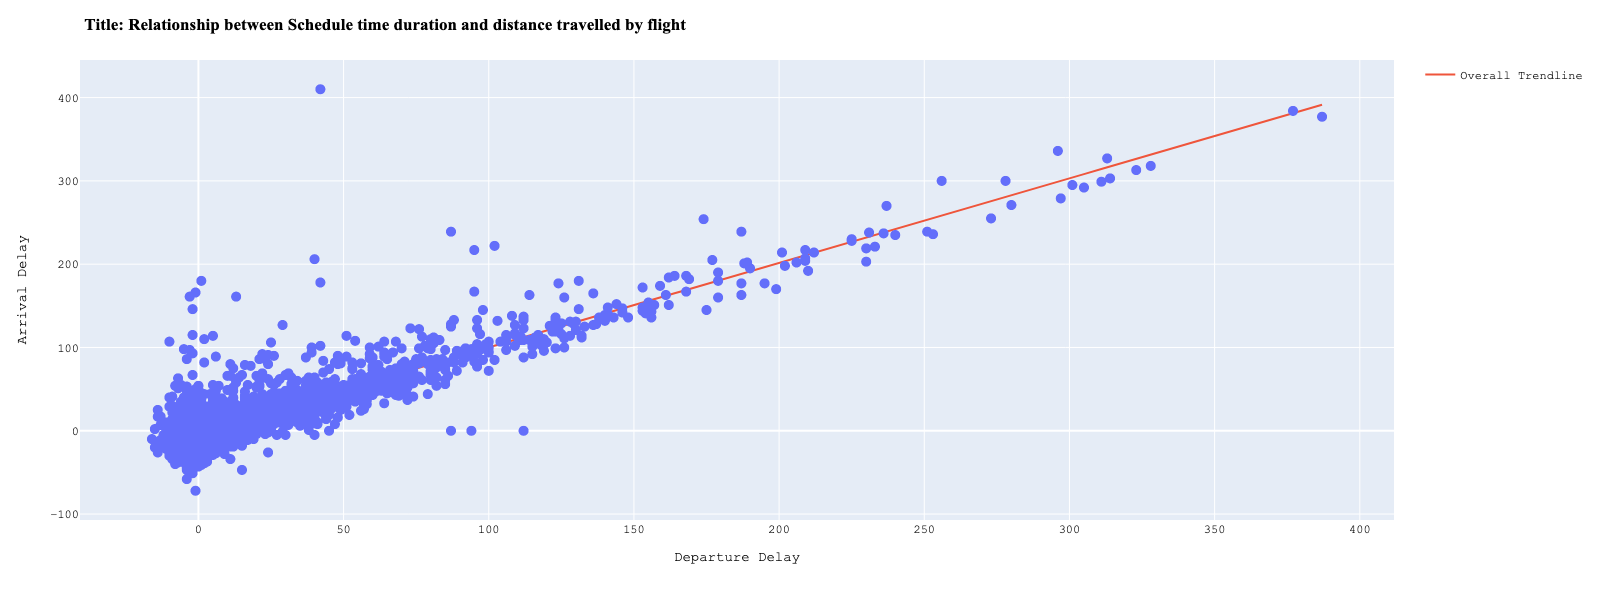

In [24]:
p=(
    df
     .query("cancelled == 0")     
     .assign(cancelled = df.cancelled.astype("category"))                  
     .plot.scatter(x= "dep_delay", y= "arr_delay",
                  trendline= "ols", 
                  #log_y= True,                   
                  width= 1600, height=600,
                  trendline_scope= "overall"                                 
                  )           
    .update_traces(marker={"size":10})
    .update_layout(            
            title = "<b> Title: Relationship between Schedule time duration and distance travelled by flight </b>",
            xaxis_title = "Departure Delay",                       
            yaxis_title = "Arrival Delay",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
    
)
p.show("png")

> Graph below shows relationship between distance travelled and arrival and departure delay

* We find that Arrival and departure delay have a positive but weak relationship with distance travelled of the flights
* We have missing arrival and departure delay for all cancelled flights.
* One way of filling those values can be to use use regression and make predictions for arrival and departure delay time.

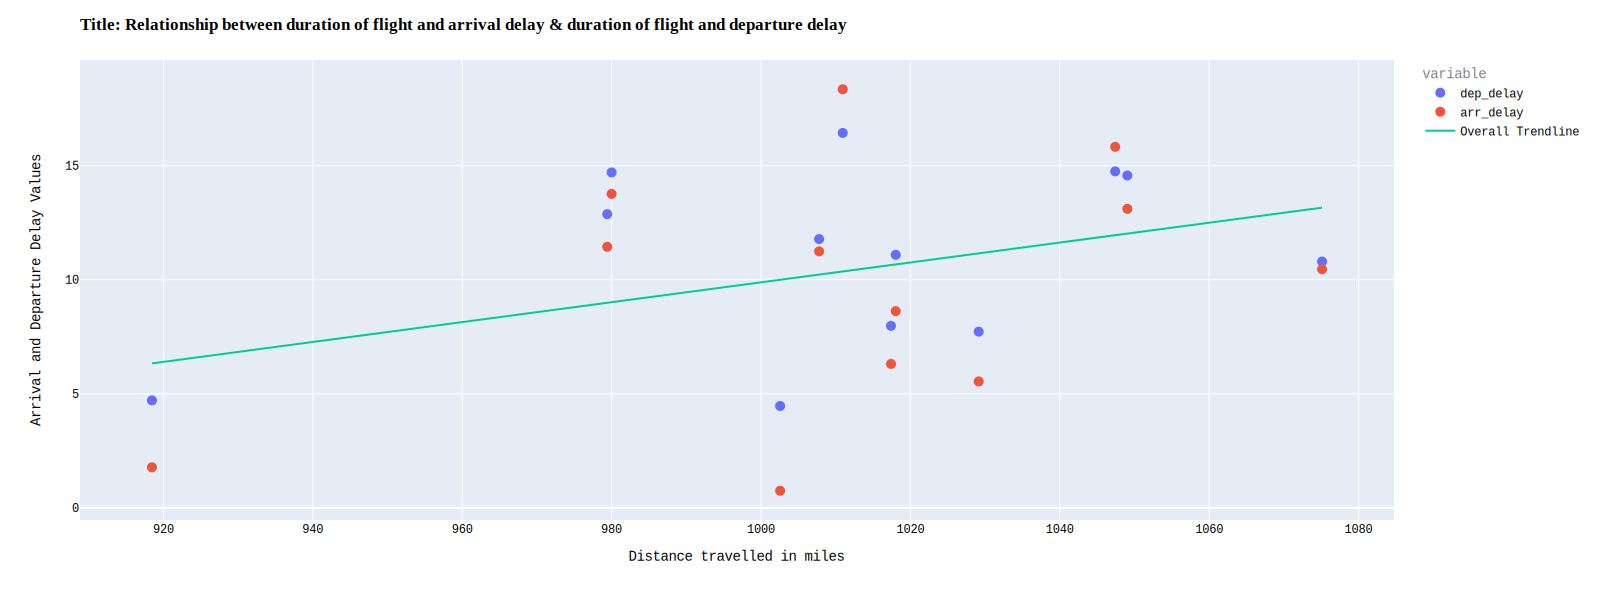

In [25]:
p=(
    df
     .query("cancelled == 0")     
     .assign(cancelled = df.cancelled.astype("category"))            
     .groupby(["month"])
     .agg("mean", numeric_only= True)    
     .reset_index()
     .melt(id_vars = ["dis_ml"], value_vars= ["dep_delay", "arr_delay"])
    .plot.scatter(x= "dis_ml", y= "value",
                  trendline= "ols", 
                  #log_y= True, 
                  color= "variable" ,                                  
                  width= 1600, height=600,
                  trendline_scope="overall"                                 
                  )           
    .update_traces(marker={"size":10})
    .update_layout(            
            title = "<b> Title: Relationship between duration of flight and arrival delay & duration of flight and departure delay </b>",
            xaxis_title = "Distance travelled in miles",                       
            yaxis_title = "Arrival and Departure Delay Values",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                         
)
p.show("svg")

### 2.1 Building Model 
* Predictive a model to predict whether a flight will be canceled based on available Data.
* Which airline has the least risk of cancellation. 

In [26]:
GRAY1 = "#231F20";GRAY2 = "#414040";GRAY3 = "#555655";GRAY4 = "#646369";GRAY5 = "#76787B";GRAY6 = "#828282";GRAY7 = "#929497";GRAY8 = "#A6A6A5";GRAY9 = "#BFBEBE";BLUE1 = "#174A7E";
BLUE2 = "#4A81BF";BLUE3 = "#94B2D7";BLUE4 = "#94AFC5";BLUE5 = "#22435e";BLUE6 = "#95B3D7";RED1 = "#C3514E";RED2 = "#E6BAB7";RED3 = "#800000";GREEN1 = "#0C8040";GREEN2 = "#9ABB59"
GREEN3 = "#31859C";GREEN4 = "#4BACC6";GREEN5 = "#93CDDD";ORANGE1 = "#F79747";ORANGE2 = "#FAC090"; BLUE_CPD1= "#137FA7";BLUE_CPD2= "#00385D";BLUE_CPD3= "#EAF6FE";BLUE_CPD4= "#51BCE1"

In [27]:
#!pip install seaborn
import seaborn as sns
df_corr =df.corr()
df_corr

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_5865/1437871735.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



cancelled     month  sched_elap_time  arr_delay  dep_delay  \
cancelled         1.000000 -0.135121       -0.069447   -0.101461  -0.127849   
month            -0.135121  1.000000       -0.020219   -0.024267  -0.015366   
sched_elap_time  -0.069447 -0.020219        1.000000    0.008899   0.032081   
arr_delay        -0.101461 -0.024267        0.008899    1.000000   0.896270   
dep_delay        -0.127849 -0.015366        0.032081    0.896270   1.000000   
dis_ml           -0.087669 -0.018286        0.982349    0.007636   0.029980   
hour              0.018247 -0.008098       -0.017585    0.106690   0.134506   

                   dis_ml      hour  
cancelled       -0.087669  0.018247  
month           -0.018286 -0.008098  
sched_elap_time  0.982349 -0.017585  
arr_delay        0.007636  0.106690  
dep_delay        0.029980  0.134506  
dis_ml           1.000000 -0.018024  
hour            -0.018024  1.000000

> Graph below shows Corelation results for the variables
* we find that all variables have correlation with our target variable (cancelled or not cancelled)
* Distance travelled and departure delay has the highest correlatin with target variable
* Distance to destination and flight duration have high correlation.
* Arrival and Departure delay also have high correlatin.
* For predictive model building i will dop variable with above .9 correlation
* I will drop schedule_elap_time variable and keep dis_ml variable for model building
* I will drop Arrival delay variable and keep departure delay variable for model building

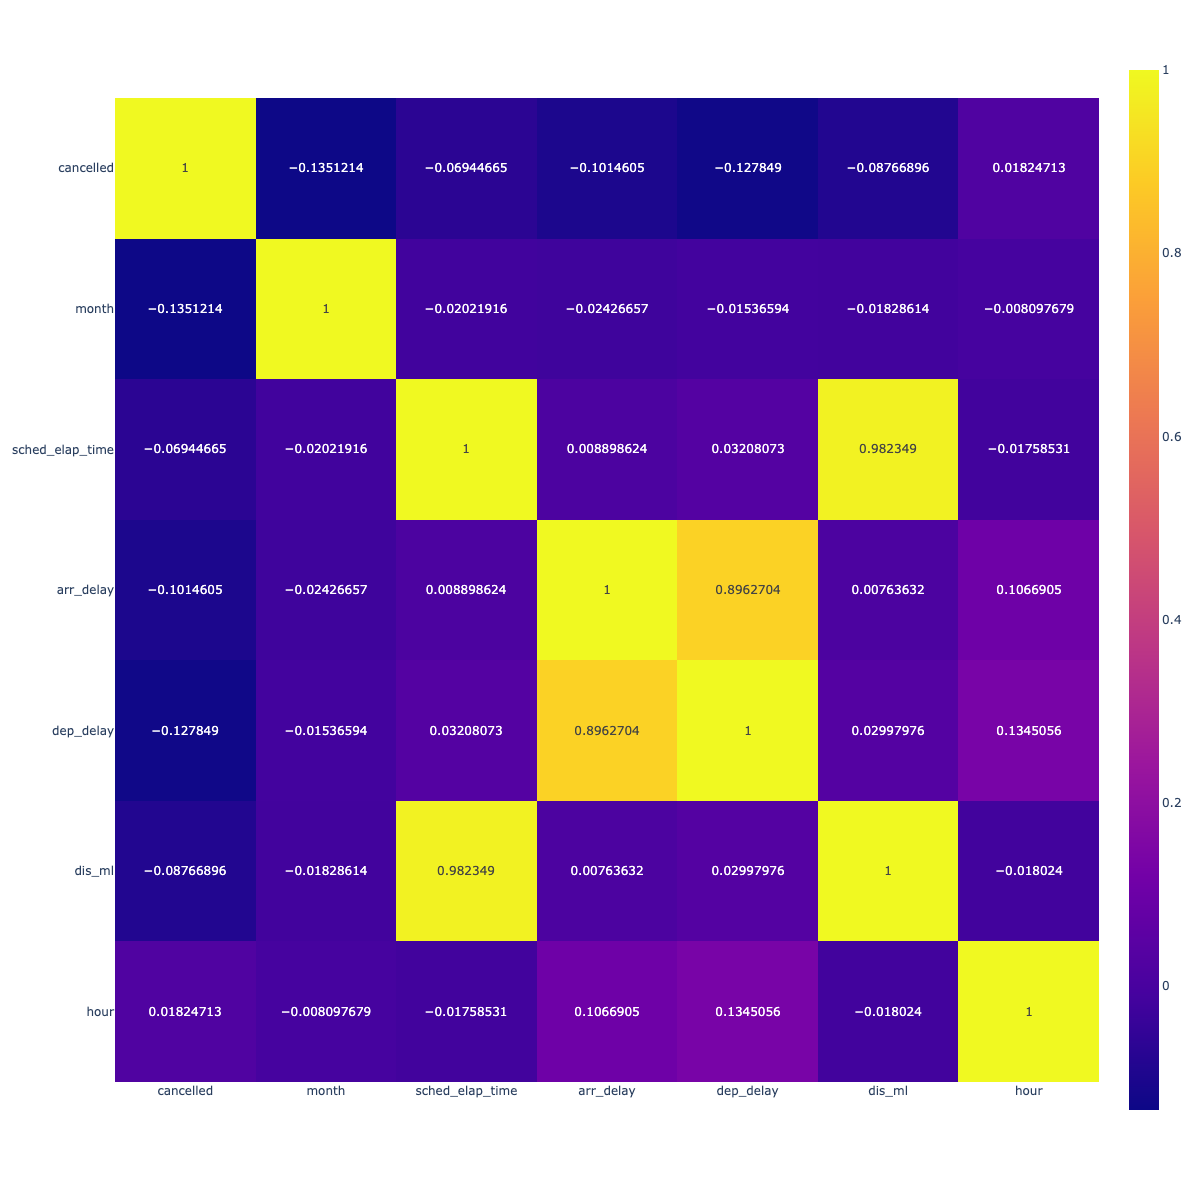

In [28]:
fig=px.imshow(df_corr,
    x=df_corr.columns, y= df_corr.index, width= 1200, height=1200, text_auto=True)
fig.show("png")

In [29]:
df_final= df.drop(columns= ["time","dep_time", "sched_elap_time","arr_delay"]).copy()
#  Define categorical and non categorical variables
# * We will convert following variables to categorical
# * cancelled(target variable), month, uniq_carrier, and hour.
target_col= ["cancelled"]
cat_cols= ["uniq_carrier", "month", "hour"]
non_cat_cols = df_final.columns[~ df_final.columns.isin(target_col+cat_cols)].tolist()

### Pair plot

In [30]:
import seaborn as sns
#sns.pairplot(df_final, hue='cancelled', height=3)

### Box Plots

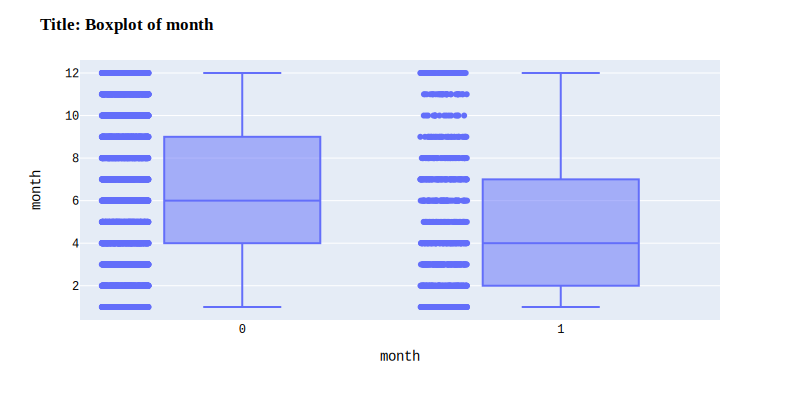

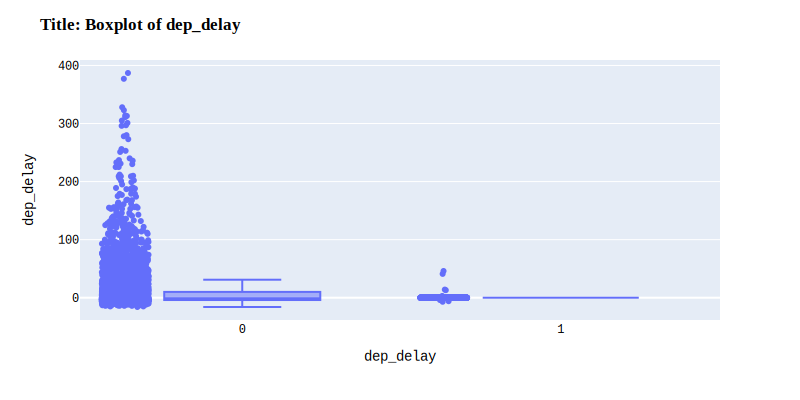

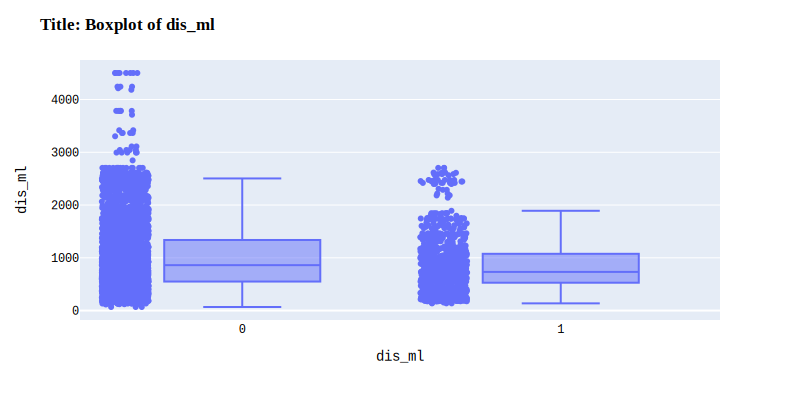

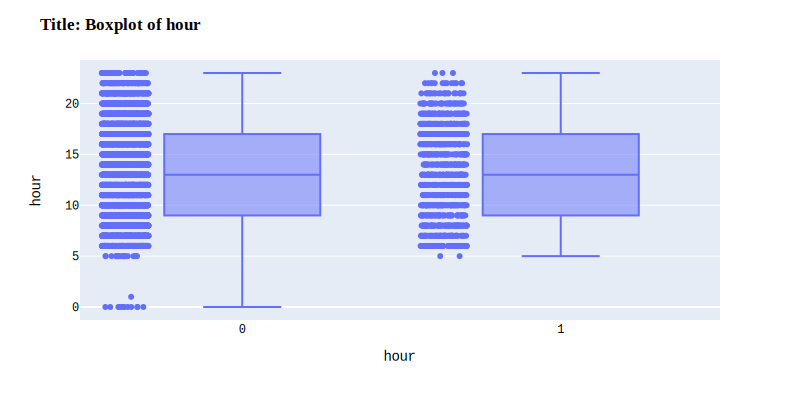

[None, None, None, None]

In [31]:
def plot_box(var):
    p=(
        df_final
        .plot.box(x="cancelled",y=var, width= 800, height=400,points="all")       
        .update_layout(
            #bargap=0.1,
            title = "<b> Title: Boxplot of {} </b>".format(var),
            xaxis_title = var,                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )        
    )
    return p.show("svg")

list(
    map(
        plot_box, df_final.columns[~ df_final.columns.isin(["uniq_carrier","cancelled"])]
        )
    )
